# 1. Neural network with Keras


In [ ]:
import numpy as np
from datetime import datetime
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils

import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random as rn
import os
from keras import backend as K

sns.set_style('whitegrid')

In [ ]:
def display_dataset(X_train, y_train):  
  fig, ax = plt.subplots(8, 8, figsize = (6, 6))
  fig.suptitle('MNIST')
  fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
  for y, x in [(j, i) for j in range(8) for i in range(8)]:
    ax[y, x].imshow(X_train[x + y])
    ax[y, x].set_title(y_train[x + y])
    ax[y,x].axis('off')

def display_history(history):
  h = history.history
  fig, ax = plt.subplots(1,2, figsize = (12,12))
  fig.suptitle('Training result')
  ax[0].set_title('Accuracy')
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('accuracy')
  ax[0].plot(h['acc'])
  ax[0].plot(h['val_acc'])
  
  

  ax[1].set_title('Loss')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('loss')
  ax[1].plot(h['loss'])
  ax[1].plot(h['val_loss'])
  fig.legend(['train','validation'])


11493376/11490434 [==============================] - 0s 0us/step


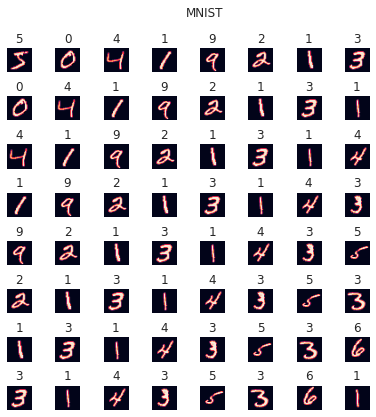

In [ ]:
NB_EPOCH = 200 # 200 세대 반복
BATCH_SIZE = 128 # 가중치 업데이트에 사용되는 훈련 데이터의 수
VERBOSE = 1
NB_CLASSES = 10 # 레이블의 개수
N_HIDDEN = 128 # 하나의 레이어에 존재하는 노드
VALIDATION_SPLIT = 0.2 # 전체 훈련데이터 수의 20%를 검증 데이터 셋으로 활용

(X_train, y_train), (X_test, y_test) = mnist.load_data() # MNIST data 불러오기
RESHAPED = 784

display_dataset(X_train, y_train)

In [ ]:
"""
하나의 데이터는 28x28 행렬
신경망에 입력하기 위해 벡터화
이후 실수로 변화 후, 
모든 성분에대해 최대 밝기값 255로 나눈다(정규화) 
"""
X_train = X_train.reshape(60000,RESHAPED).astype('float32')
X_test = X_test.reshape(10000,RESHAPED).astype('float32')

X_train /= 255
X_test /= 255

"""
y_train은 훈련 데이터에 상응하는 60000개의 성분을 가지고 있는 하나의 벡터
원핫코딩을 적용하여, 열의 수를 레이블의 개수만큼 만들고, y_train 성분의 개수 만큼 행을 만들어 Y_train에 저장.
y_train의 n번째 성분에 있는 값 m -> Y_train의 n번째 행, m번째 열에 1표기, 나머지는 0 
"""
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

#1.1 Single layer perceptron
> There is only one fully connected layer, so # of nodes in the layer is 10(i.e. # of labels)   
> Because image is 2D matrix, it has to be vertorized to be entered.  
> An activation function, softmax, makes large value be larger, and small value be smaller, normalizing values.  


In [ ]:
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape = (RESHAPED,),activation = 'softmax'))
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [ ]:
start = datetime.now()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = 20,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
end = datetime.now()
elasped = end - start

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










In [ ]:
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(elasped))

training_time(HH:MM:SS.ms) - 0:00:16.741995




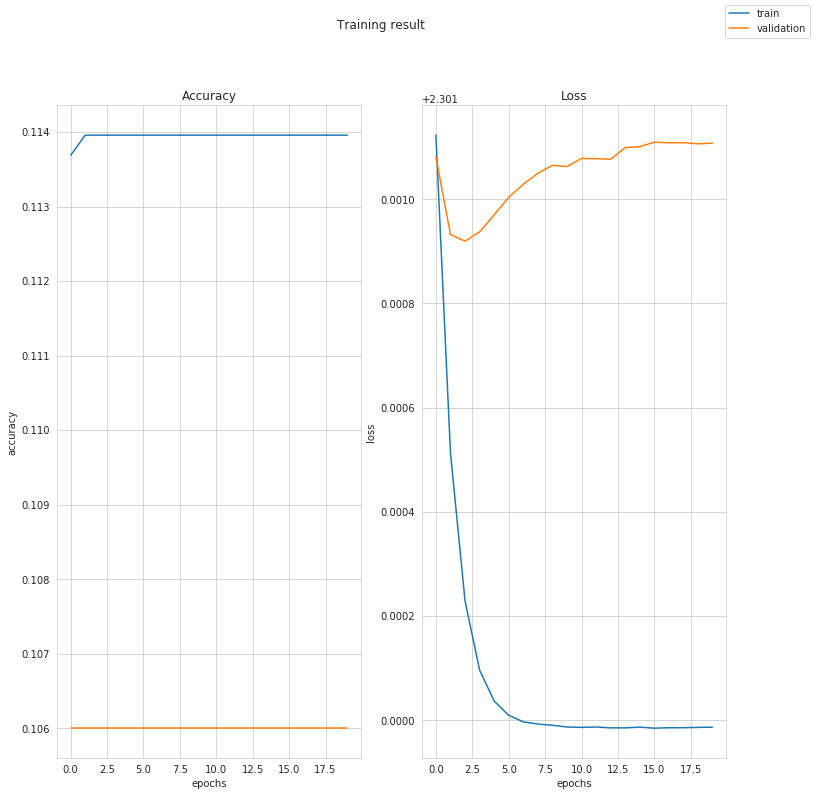

In [ ]:
display_history(history)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 0)
print('Loss :',score[0])
print('Accuracy :',score[1])

Loss : 0.27744982947707175
Accuracy : 0.9219


### Multi layer perceptron (MLP)

> Experiment 1.  
> Make various MLP that only difference is # of layers

In [ ]:
def create_mlp(layers):

  model = Sequential()
  model.add(Dense(N_HIDDEN, input_shape = (RESHAPED,), activation = 'relu'))
  if layers > 2:
    for i in range(layers - 2):
      model.add(Dense(N_HIDDEN, activation = 'relu'))
  model.add(Dense(NB_CLASSES, activation = 'softmax'))
  return model

In [ ]:
model = create_mlp(2)
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics= ['accuracy'])
NB_EPOCH = 20

start = datetime.now()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
end = datetime.now()
elasped = end - start

In [ ]:
print('Elasped time(HH:MM:SS.ms) - {}\n\n'.format(elasped))

Elasped time(HH:MM:SS.ms) - 0:00:23.699142




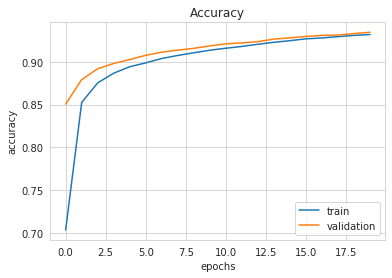

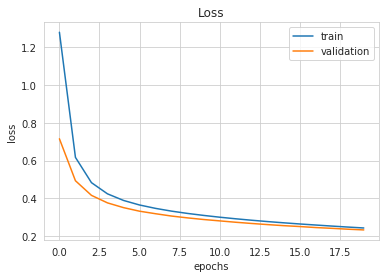

In [ ]:
display_history(history = history)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)
print('Loss :',score[0])
print('Accuracy :',score[1])

10000/10000 [==============================] - 0s 37us/step
Loss : 0.23470006955862047
Accuracy : 0.9339


In [ ]:
model = create_mlp(3)
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics= ['accuracy'])
NB_EPOCH = 20

start = datetime.now()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
end = datetime.now()
elasped = end - start

In [ ]:
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(elasped))

training_time(HH:MM:SS.ms) - 0:00:24.531512




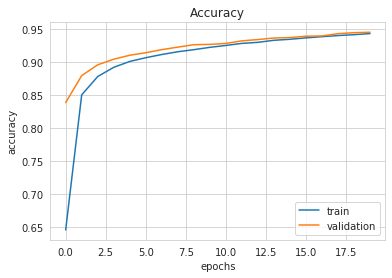

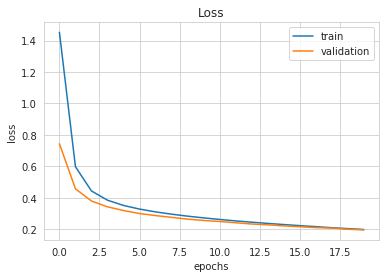

In [ ]:
display_history(history = history)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)
print('Loss :',score[0])
print('Accuracy :',score[1])

10000/10000 [==============================] - 0s 38us/step
Loss : 0.1954730763554573
Accuracy : 0.9431


In [ ]:
model = create_mlp(4)
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_88 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_89 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_90 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics= ['accuracy'])
NB_EPOCH = 20

start = datetime.now()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
end = datetime.now()
elasped = end - start

In [ ]:
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(elasped))

training_time(HH:MM:SS.ms) - 0:00:27.716614




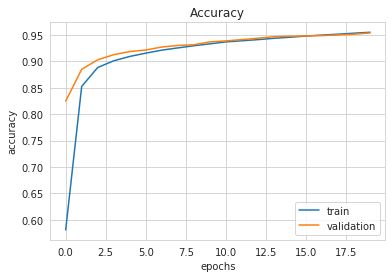

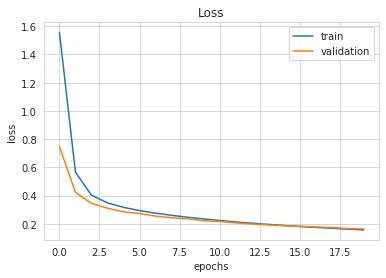

In [ ]:
display_history(history = history)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)
print('Loss :',score[0])
print('Accuracy :',score[1])

10000/10000 [==============================] - 0s 41us/step
Loss : 0.15859400407001376
Accuracy : 0.9534


In [ ]:
model = create_mlp(20)
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_92 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_93 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_94 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_95 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_96 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_97 (Dense)             (None, 128)             

In [ ]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics= ['accuracy'])
NB_EPOCH = 20

start = datetime.now()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
end = datetime.now()
elasped = end - start


In [ ]:
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(elasped))

training_time(HH:MM:SS.ms) - 0:00:46.062510




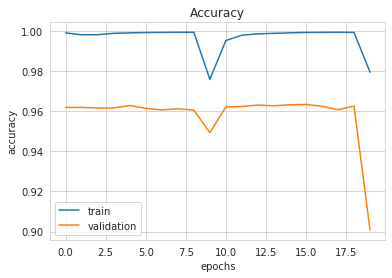

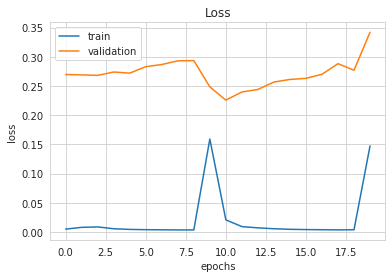

In [ ]:
display_history(history = history)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)
print('Loss :',score[0])
print('Accuracy :',score[1])

10000/10000 [==============================] - 1s 60us/step
Loss : 0.3444425508320332
Accuracy : 0.8984


In [ ]:
from keras.layers.core import Dropout

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape = (RESHAPED,), activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(N_HIDDEN, activation='relu'))
model.add(Dense(NB_CLASSES, activation = 'softmax'))

model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
________________________________________________________________

In [ ]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics= ['accuracy'])
NB_EPOCH = 20

start = datetime.now()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
end = datetime.now()
elasped = end - start

In [ ]:
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(elasped))

training_time(HH:MM:SS.ms) - 0:00:33.054340




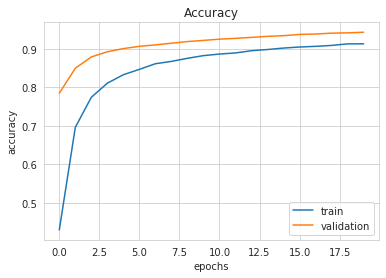

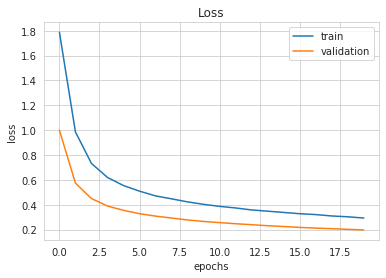

In [ ]:
display_history(history = history)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)
print('Loss :',score[0])
print('Accuracy :',score[1])

10000/10000 [==============================] - 0s 49us/step
Loss : 0.19677915369346738
Accuracy : 0.9413


In [ ]:
def create_mlp(layers, initializer):

  model = Sequential()
  model.add(Dense(N_HIDDEN, input_shape = (RESHAPED,), activation = 'relu', kernel_initializer = initializer))
  if layers > 2:
    for i in range(layers - 2):
      model.add(Dense(N_HIDDEN, activation = 'relu',kernel_initializer=initializer))
  model.add(Dense(NB_CLASSES, activation = 'softmax', kernel_initializer = initializer))
  return model

In [ ]:
model = create_mlp(4, 'he_uniform')
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_131 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_132 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_133 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_134 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics= ['accuracy'])
NB_EPOCH = 20

start = datetime.now()
history = model.fit(X_train, Y_train ,batch_size = BATCH_SIZE, epochs = NB_EPOCH,
                    verbose = VERBOSE,validation_split = VALIDATION_SPLIT)
end = datetime.now()
elasped = end - start

In [ ]:
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(elasped))

training_time(HH:MM:SS.ms) - 0:00:30.519976




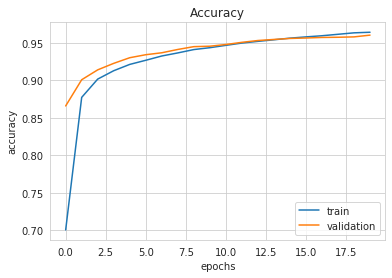

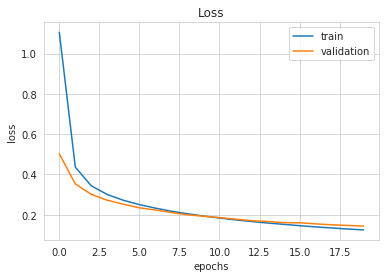

In [ ]:
display_history(history = history)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)
print('Loss :',score[0])
print('Accuracy :',score[1])

10000/10000 [==============================] - 0s 47us/step
Loss : 0.1362456107635051
Accuracy : 0.9586


In [ ]:
model = create_mlp(4, 'he_normal')
model.summary()


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_136 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_137 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_138 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics= ['accuracy'])
NB_EPOCH = 20

start = datetime.now()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
end = datetime.now()
elasped = end - start

In [ ]:
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(elasped))

training_time(HH:MM:SS.ms) - 0:00:31.903049




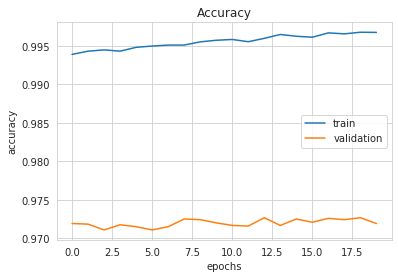

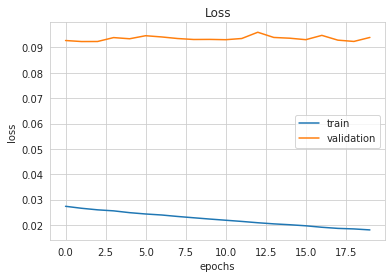

In [ ]:
display_history(history = history)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)
print('Loss :',score[0])
print('Accuracy :',score[1])

10000/10000 [==============================] - 1s 56us/step
Loss : 0.08167059015065897
Accuracy : 0.9766


In [ ]:
model = create_mlp(4,'glorot_normal')
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_140 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_141 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_142 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics= ['accuracy'])
NB_EPOCH = 20

start = datetime.now()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
end = datetime.now()
elasped = end - start

In [ ]:
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(elasped))

training_time(HH:MM:SS.ms) - 0:00:31.330089




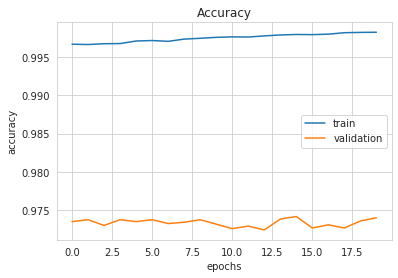

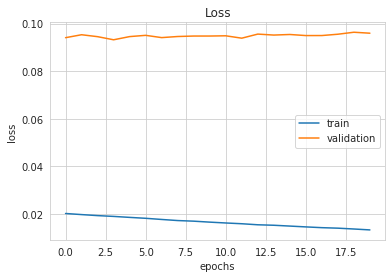

In [ ]:
display_history(history = history)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)
print('Loss :',score[0])
print('Accuracy :',score[1])

10000/10000 [==============================] - 0s 49us/step
Loss : 0.09390878998398548
Accuracy : 0.974


In [ ]:
model = create_mlp(4,'glorot_normal')
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_243 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_244 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_245 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_246 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics= ['accuracy'])
NB_EPOCH = 20

start = datetime.now()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
end = datetime.now()
elasped = end - start

In [ ]:
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(elasped))

training_time(HH:MM:SS.ms) - 0:00:37.701307




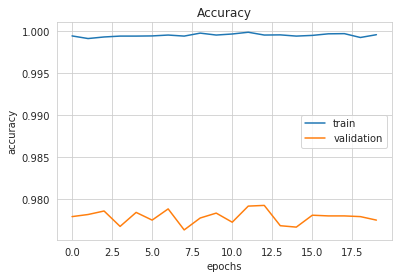

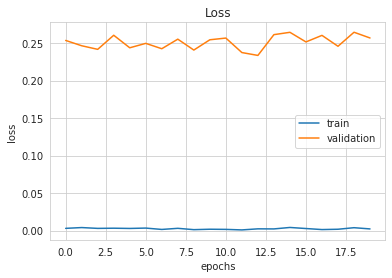

In [ ]:
display_history(history = history)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)
print('Loss :',score[0])
print('Accuracy :',score[1])

10000/10000 [==============================] - 1s 60us/step
Loss : 0.2408776273853462
Accuracy : 0.9797


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])
NB_EPOCH = 20

start = datetime.now()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
end = datetime.now()
elasped = end - start

In [ ]:
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(elasped))

training_time(HH:MM:SS.ms) - 0:00:43.499399




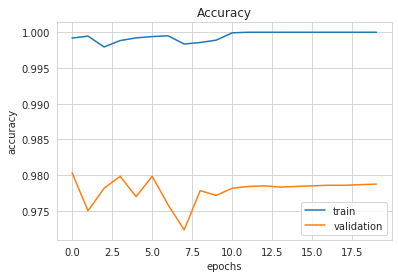

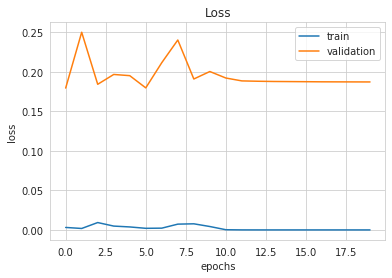

In [ ]:
display_history(history = history)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)
print('Loss :',score[0])
print('Accuracy :',score[1])

10000/10000 [==============================] - 1s 60us/step
Loss : 0.1719769303953458
Accuracy : 0.9816


In [ ]:
from keras.regularizers import l2

In [ ]:
def create_mlp(layers, initializer):

  model = Sequential()
  model.add(Dense(N_HIDDEN, input_shape = (RESHAPED,), activation = 'relu', kernel_initializer = initializer,kernel_regularizer=l2(0.01)))
  if layers > 2:
    for i in range(layers - 2):
      model.add(Dense(N_HIDDEN, activation = 'relu',kernel_initializer=initializer))
  model.add(Dense(NB_CLASSES, activation = 'softmax', kernel_initializer = initializer))
  return model

In [ ]:
model = create_mlp(4,'glorot_normal')
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_311 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_312 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_313 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_314 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])
NB_EPOCH = 20

start = datetime.now()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
end = datetime.now()
elasped = end - start

In [ ]:
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(elasped))

training_time(HH:MM:SS.ms) - 0:00:46.950932




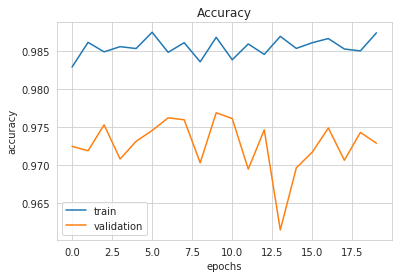

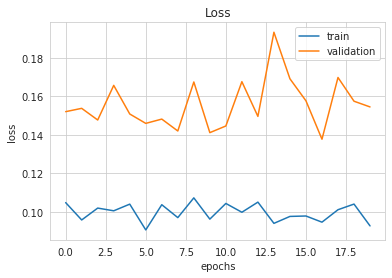

In [ ]:
display_history(history = history)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)
print('Loss :',score[0])
print('Accuracy :',score[1])

10000/10000 [==============================] - 1s 71us/step
Loss : 0.159100244140625
Accuracy : 0.9721


In [ ]:
from keras.layers.core import Dropout

def create_mlp(layers, initializer):

  model = Sequential()
  model.add(Dense(N_HIDDEN, input_shape = (RESHAPED,), activation = 'relu', kernel_initializer = initializer))
  model.add(Dropout(0.3))
  if layers > 2:
    for i in range(layers - 2):
      model.add(Dense(N_HIDDEN, activation = 'relu',kernel_initializer=initializer))
  model.add(Dense(NB_CLASSES, activation = 'softmax', kernel_initializer = initializer))
  return model

In [ ]:
model = create_mlp(4, 'glorot_normal')
model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_315 (Dense)            (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_316 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_317 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_318 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_______________________________________________________________

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])
NB_EPOCH = 20

start = datetime.now()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
end = datetime.now()
elasped = end - start

In [ ]:
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(elasped))

training_time(HH:MM:SS.ms) - 0:00:49.921211




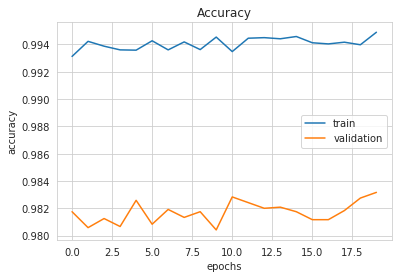

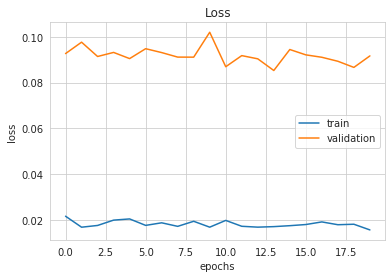

In [ ]:
display_history(history = history)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)
print('Loss :',score[0])
print('Accuracy :',score[1])

10000/10000 [==============================] - 1s 72us/step
Loss : 0.08631212903730374
Accuracy : 0.9834


In [ ]:
from keras.layers import Activation, BatchNormalization
def create_mlp(layers, initializer):

  model = Sequential()
  model.add(Dense(N_HIDDEN, input_shape = (RESHAPED,), kernel_initializer = initializer))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  if layers > 2:
    for i in range(layers - 2):
      model.add(Dense(N_HIDDEN, activation = 'relu',kernel_initializer=initializer))
  model.add(Dense(NB_CLASSES, activation = 'softmax', kernel_initializer = initializer))
  return model

In [ ]:
model = create_mlp(4, 'glorot_normal')

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])
NB_EPOCH = 20

start = datetime.now()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
end = datetime.now()
elasped = end - start

In [ ]:
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(elasped))

training_time(HH:MM:SS.ms) - 0:00:58.543844




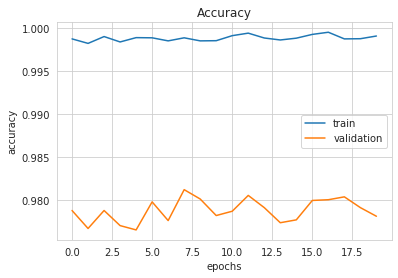

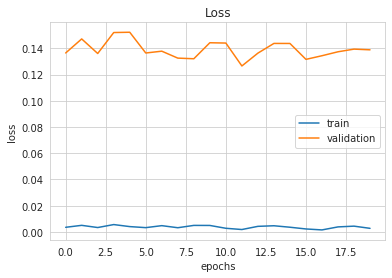

In [ ]:
display_history(history = history)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)
print('Loss :',score[0])
print('Accuracy :',score[1])

10000/10000 [==============================] - 1s 79us/step
Loss : 0.11415351132852368
Accuracy : 0.9816


In [ ]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape = (RESHAPED,), kernel_regularizer=l2(0.01), activation = 'relu', kernel_initializer=RandomUniform(seed = seed)))
model.add(Dense(N_HIDDEN, kernel_regularizer = l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES, activation = 'softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 118,794
Trainable params: 118,538
Non-trainable params: 256
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy','mae'])
NB_EPOCH = 20

start = datetime.now()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
end = datetime.now()
elasped = end - start

In [ ]:
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(elasped))

training_time(HH:MM:SS.ms) - 0:00:55.716126




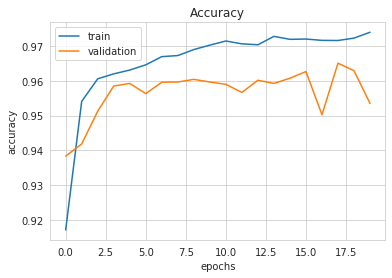

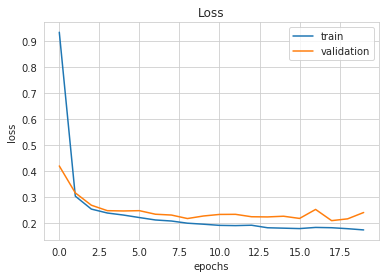

In [ ]:
display_history(history = history)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)
print('Loss :',score[0])
print('Accuracy :',score[1])

10000/10000 [==============================] - 0s 36us/step
Loss : 0.2413205334663391
Accuracy : 0.9516


In [ ]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape = (RESHAPED,), activation = 'relu'))
model.add(Dense(N_HIDDEN, activation = 'relu'))
model.add(Dense(NB_CLASSES, activation = 'softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])
NB_EPOCH = 20

start = datetime.now()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
end = datetime.now()
elasped = end - start

In [ ]:
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(elasped))

training_time(HH:MM:SS.ms) - 0:00:36.291212




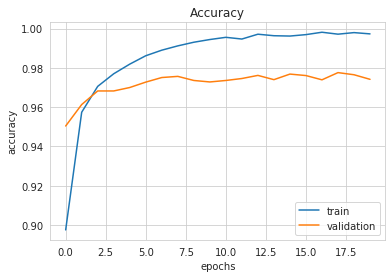

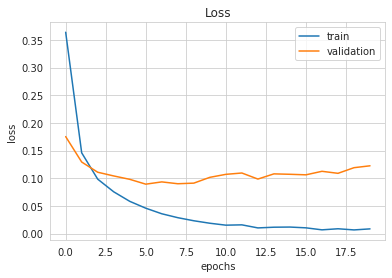

In [ ]:
display_history(history = history)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)
print('Loss :',score[0])
print('Accuracy :',score[1])

10000/10000 [==============================] - 1s 52us/step
Loss : 0.1153397908950079
Accuracy : 0.9763


In [ ]:
model = Sequential()
model.add(Dense(N_HIDDEN//2, input_shape = (RESHAPED,), activation = 'relu'))
model.add(Dense(N_HIDDEN//2, activation='relu'))
model.add(Dense(N_HIDDEN//2, activation='relu'))
model.add(Dense(N_HIDDEN//2, activation='relu'))
model.add(Dense(NB_CLASSES, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 10)                650       
Total params: 63,370
Trainable params: 63,370
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])
NB_EPOCH = 20

start = datetime.now()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
end = datetime.now()
elasped = end - start

In [ ]:
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(elasped))

training_time(HH:MM:SS.ms) - 0:00:41.980966




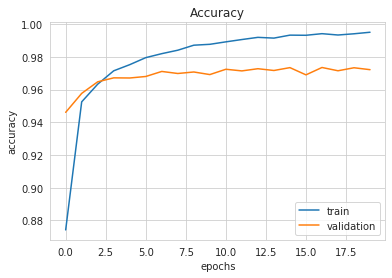

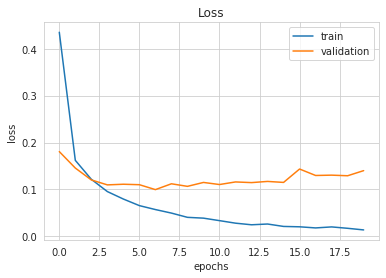

In [ ]:
display_history(history = history)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)
print('Loss :',score[0])
print('Accuracy :',score[1])

10000/10000 [==============================] - 1s 54us/step
Loss : 0.1292715708233065
Accuracy : 0.9711


In [ ]:
model = Sequential()
model.add(Dense(N_HIDDEN//2, input_shape = (RESHAPED,), activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(N_HIDDEN//2, activation='relu'))
model.add(Dense(N_HIDDEN//2, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(N_HIDDEN//2, activation='relu'))
model.add(Dense(NB_CLASSES, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 10)               

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])
NB_EPOCH = 20

start = datetime.now()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
end = datetime.now()
elasped = end - start

In [ ]:
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(elasped))

training_time(HH:MM:SS.ms) - 0:00:44.396037




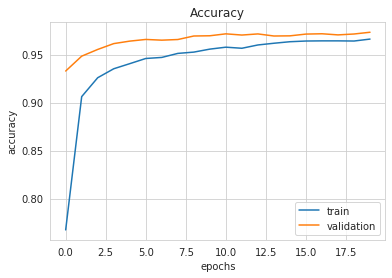

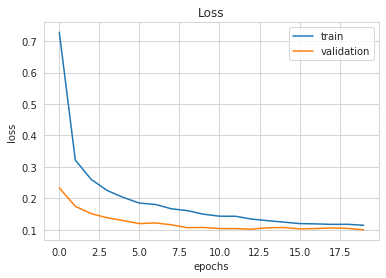

In [ ]:
display_history(history = history)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)
print('Loss :',score[0])
print('Accuracy :',score[1])

10000/10000 [==============================] - 1s 56us/step
Loss : 0.10007970939144725
Accuracy : 0.9721


In [ ]:
model = Sequential()
model.add(Dense(N_HIDDEN//2, input_shape = (RESHAPED,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN//2, activation='relu'))
model.add(Dense(N_HIDDEN//2, activation='relu'))
model.add(Dense(N_HIDDEN//2, activation='relu'))
model.add(Dense(NB_CLASSES, activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
activation_3 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_32 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_33 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_34 (Dense)             (None, 10)              

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])
NB_EPOCH = 20

start = datetime.now()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
end = datetime.now()
elasped = end - start

In [ ]:
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(elasped))

training_time(HH:MM:SS.ms) - 0:00:54.976011




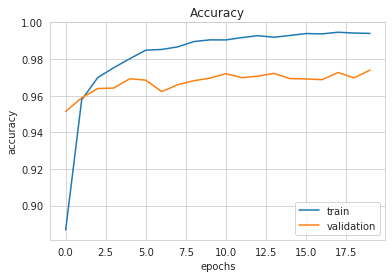

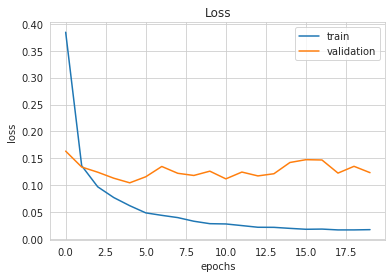

In [ ]:
display_history(history = history)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)
print('Loss :',score[0])
print('Accuracy :',score[1])

10000/10000 [==============================] - 1s 61us/step
Loss : 0.11698520833520779
Accuracy : 0.9737


In [ ]:
model = Sequential()
model.add(Dense(N_HIDDEN//2, input_shape = (RESHAPED,), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN//2, activation='relu'))
model.add(Dense(N_HIDDEN//2, activation='relu'))
model.add(Dense(N_HIDDEN//2, activation='relu'))
model.add(Dense(NB_CLASSES, activation='softmax'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_38 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_39 (Dense)             (None, 10)              

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])
NB_EPOCH = 20

start = datetime.now()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
end = datetime.now()
elasped = end - start

In [ ]:
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(elasped))

training_time(HH:MM:SS.ms) - 0:00:56.556603




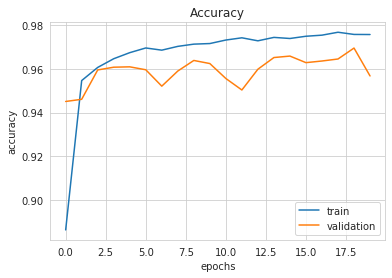

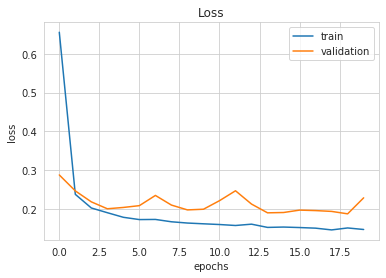

In [ ]:
display_history(history = history)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)
print('Loss :',score[0])
print('Accuracy :',score[1])

10000/10000 [==============================] - 1s 65us/step
Loss : 0.22541599502563475
Accuracy : 0.9526
